# Проект: Обучение с учителем: качество модели

### Техническое задание

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. 

Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

### План выполнения <a id='plan_global'></a>

1. [Изучение общей информации](#task_1) <a id='task_1_plan'></a>
    - Пропущенные значения
    - Неправильные типы данных


2. [Предобработка данных](#task_2) <a id='task_2_plan'></a>
    - [Замена названий и значений столбцов](#task_2_1) <a id='task_2_plan_1'></a>
    - [Изменение ошибочных значений](#task_2_2) <a id='task_2_plan_2'></a>
    - [Удаление возможных дубликатов](#task_2_3) <a id='task_2_plan_3'></a>


3. [Исследовательский анализ данных](#task_3) <a id='task_3_plan'></a>
    - [Статистический анализ количественных признаков таблицы 'market'](#task_3_1) <a id='task_3_plan_1'></a>
    - [Поиск выбросов количественных признаков таблицы 'market'](#task_3_2) <a id='task_3_plan_2'></a>
    - [Исследовательский анализ категориальных признаков таблицы 'market'](#task_3_3) <a id='task_3_plan_3'></a>
    - [Исследовательский анализ признаков таблицы 'market_money'](#task_3_4) <a id='task_3_plan_4'></a>
    - [Исследовательский анализ признаков таблицы 'market_time'](#task_3_5) <a id='task_3_plan_5'></a>
    - [Исследовательский анализ признаков таблицы 'money'](#task_3_6) <a id='task_3_plan_6'></a>


4. [Объединение таблиц](#task_4) <a id='task_4_plan'></a>
    - Объединение таблиц **`market_file`**, **`market_money`**, **`market_time`**
    - Создание отдельных столбов с данными о выручке и времени на сайте для каждого периода


5. [Корреляционный анализ](#task_5) <a id='task_5_plan'></a>
    - [Корреляционный анализ категориальных признаков](#task_5_1) <a id='task_5_plan_1'></a>
    - [Корреляционный анализ количественных признаков](#task_5_2) <a id='task_5_plan_2'></a>
    - [Диаграммы рассеяния между всеми количественными признаками с влиянием целевого](#task_5_3) <a id='task_5_plan_3'></a>


6. [Использование пайплайнов](#task_6) <a id='task_6_plan'></a>
    - [Подготовка данных](#task_6_1) <a id='task_6_plan_1'></a>
    - [Обучение модели. Подбор гиперпараметров](#task_6_2) <a id='task_6_plan_2'></a>


7. [Анализ важности признаков](#task_7) <a id='task_7_plan'></a>
    - [Визуализации вклада признаков в каждое предсказание модели](#task_7_1) <a id='task_7_plan_1'></a>
    - [Индивидуальные SHAP-значения выборочного наблюдения](#task_7_2) <a id='task_7_plan_2'></a>
    - [Общий вклад признаков в прогнозы модели](#task_7_3) <a id='task_7_plan_3'></a>


8. Сегментация покупателей
    - Выполнение сегментации покупателей, используя результаты моделирования и данные о прибыльности покупателей
    - Выбор группы покупателей. Предложение как увеличить её покупательскую активность
    - Выводы о сегментах


9. Общий вывод работы


### Описание данных

- **`market_file`** - данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. <a id='market_file'></a>
    - `id` — номер покупателя в корпоративной базе данных.
    - `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
    - `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
    - `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
    - `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


- **`market_money`** - данные о выручке, которую получает магазин с покупателя <a id='market_money'></a>
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксирована выручка.
    - `Выручка` — сумма выручки за период.


- **`market_time`** - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода. <a id='market_time'></a>
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксировано общее время.
    - `минут` — значение времени, проведённого на сайте, в минутах.


- **`money`** - данные о среднемесячной прибыли продавца за последние 3 месяца <a id='money'></a>
    - `id` — номер покупателя в корпоративной базе данных.
    - `Прибыль` — значение прибыли.

In [ ]:
!pip install numpy==1.22.4
!pip install shap
!pip install matplotlib==3.5.0
!pip install scikit-learn==1.6.1
!pip install phik==0.12.4

In [2]:
# В дальнейшем поменять, добавить и структурировать!

import warnings
import phik
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, RocCurveDisplay

pd.options.display.max_columns = 30
warnings.filterwarnings("ignore")
RANDOM_STATE = 42

### [Изучение общей информации](#task_1_plan) <a id='task_1'></a>

In [3]:
def parse_dataset(path, sep=','):
    df = pd.read_csv(path, sep=sep)

    display(df.head())
    
    print('\nПроцент пропусков')
    display((df.isna().mean()*100).sort_values(ascending=False))
    df.info()

    return df

In [4]:
def unique_category(df):
    for clmn in df.select_dtypes(exclude='number'):
        print(clmn+":", df[clmn].unique(), end='\n\n')

#### [Датасет market](#market_file)

In [5]:
try:
    market = parse_dataset('./datasets/market_file.csv')
except:
    market = parse_dataset('datasets/market_file.csv')

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2


Процент пропусков


id                                     0.0
Покупательская активность              0.0
Тип сервиса                            0.0
Разрешить сообщать                     0.0
Маркет_актив_6_мес                     0.0
Маркет_актив_тек_мес                   0.0
Длительность                           0.0
Акционные_покупки                      0.0
Популярная_категория                   0.0
Средний_просмотр_категорий_за_визит    0.0
Неоплаченные_продукты_штук_квартал     0.0
Ошибка_сервиса                         0.0
Страниц_за_визит                       0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [6]:
unique_category(market)

Покупательская активность: ['Снизилась' 'Прежний уровень']

Тип сервиса: ['премиум' 'стандартт' 'стандарт']

Разрешить сообщать: ['да' 'нет']

Популярная_категория: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']



1. Пропусков в таблице **`market`** не обнаружено
2. Явные неправильные типы данных отсутствуют
3. Бинарные категориальные признаки:
    - `Покупательская активность` (целевой)
    - `Тип сервиса`
    - `Разрешить сообщать`
4. Опечатки в категориальных признаках:
    - значение 'стандартт' в `Тип сервиса` следует заменить на 'стандарт'
5. Все столбцы стоит привести к стандартам оформления

#### [Датасет market_money](#market_money)

In [7]:
try:
    market_money = parse_dataset('./datasets/market_money.csv')
except:
    market_money = parse_dataset('datasets/market_money.csv')

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6


Процент пропусков


id         0.0
Период     0.0
Выручка    0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [8]:
unique_category(market_money)

Период: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']



1. Пропусков в таблице **`market_money`** не обнаружено
2. Явные неправильные типы данных отсутствуют
3. Все столбцы стоит привести к стандартам оформления

#### [Датасет market_time](#market_time)

In [9]:
try:
    market_time = parse_dataset('./datasets/market_time.csv')
except:
    market_time = parse_dataset('datasets/market_time.csv')

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13


Процент пропусков


id        0.0
Период    0.0
минут     0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [10]:
unique_category(market_time)

Период: ['текущий_месяц' 'предыдцщий_месяц']



1. Пропусков в таблице **`market_time`** не обнаружено
2. Явные неправильные типы данных отсутствуют
3. Бинарные категориальные признаки:
    - `Период` 
4. Опечатки в категориальных признаках:
    - значение 'предыдцщий_месяц' в `Период` следует заменить на 'предыдущий_месяц'
5. Все столбцы стоит привести к стандартам оформления

#### [Датасет money](#money)

In [11]:
try:
    money = parse_dataset('./datasets/money.csv', sep=';')
except:
    money = parse_dataset('datasets/money.csv', sep=';')

id Прибыль
0  215348    0,98
1  215349    4,16
2  215350    3,13
3  215351    4,87
4  215352    4,21


Процент пропусков


id         0.0
Прибыль    0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


1. Пропусков в таблице **`money`** не обнаружено
2. Столбец `Прибыль` имеет неправильный тип данных
3. Все столбцы стоит привести к стандартам оформления

#### Вывод по изучению общей информации

В таблицах отсутствуют пропуски. Столбец `Прибыль` из датасета **`money`** имеет неправильный тип данных. Бинарные признаки стоит перевести в float с значениями 1.0 и 0.0. \
Все столбцы необходимо привести в нижний змеиный регистр. 

- Опечатки в категориальных признаках:
    1. `market`: значение 'стандартт' в `Тип сервиса` следует заменить на 'стандарт'
    2. `market_time`: значение 'предыдцщий_месяц' в `Период` следует заменить на 'предыдущий_месяц'


<font size="2">[вернуться к плану выполнения](#plan_global)</font>

### [Предобработка данных](#task_2_plan) <a id='task_2'></a>

#### [Замена названий и значений столбцов](#task_2_plan_1) <a id='task_2_1'></a>

In [12]:
def get_columns(clm):
    return clm.lower().replace(" ", "_")

In [13]:
market.rename(columns=get_columns, inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [14]:
market_money.rename(columns=get_columns, inplace=True)
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [15]:
market_time.rename(columns=get_columns, inplace=True)
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [16]:
money.rename(columns=get_columns, inplace=True)
money['прибыль'] = money['прибыль'].apply(lambda x: float(x.replace(',', '.')))

money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Названия столбцов были приведены к нижнему змеиному регистру, согласно стандартам оформления. Тип данных столбца `прибыль` был изменен на float.

#### [Изменение ошибочных значений](#task_2_plan_2) <a id='task_2_2'></a>

In [17]:
market['тип_сервиса'].where(market['тип_сервиса'] != 'стандартт', 'стандарт', inplace=True)
market['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Опечатка в датасете **`market`** в столбце `тип_сервиса` была исправлена с 'стандартт' на 'стандарт'.

In [18]:
market_time['период'].where(market_time['период'] != 'предыдцщий_месяц', 'предыдущий_месяц', inplace=True)
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Опечатка в датасете **`market_time`** в столбце `период` была исправлена с 'предыдцщий_месяц' на 'предыдущий_месяц'.

#### [Удаление возможных дубликатов](#task_2_plan_3) <a id='task_2_3'></a>

In [19]:
market.duplicated(subset='id').sum()

0

В таблице **`market`**, с данными о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении, дубликаты отсутствуют.

In [20]:
market_money.duplicated().sum()

0

В таблице **`market_money`** каждый `id` встречается 3 раза, согласну столбцу `период` ('препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц') \
Явные дубликаты отсутствуют

In [21]:
market_time.duplicated().sum()

0

В таблице **`market_time`** каждый `id` встречается 2 раза, согласну столбцу `период` ('текущий_месяц', 'предыдущий_месяц') \
Явные дубликаты отсутствуют

In [22]:
money.duplicated().sum()

0

В таблице **`money`** дубликаты отсутствуют

#### Вывод предобработки данных

1. Названия столбцов были приведены к нижнему змеиному регистру, согласно стандартам оформления
2. Опечатки в датасетах `market`, `market_time` были исправлены
3. Дубликаты в таблицах отсутствуют

<font size="2">[вернуться к плану выполнения](#plan_global)</font>

### [Исследовательский анализ данных](#task_3_plan) <a id='task_3'></a>

#### [Статистический анализ количественных признаков таблицы 'market'](#task_3_plan_1) <a id='task_3_1'></a>

In [23]:
round(market.iloc[:, 1:].describe(), 2)

маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
count             1300.00               1300.00       1300.00   
mean                 4.25                  4.01        601.90   
std                  1.01                  0.70        249.86   
min                  0.90                  3.00        110.00   
25%                  3.70                  4.00        405.50   
50%                  4.20                  4.00        606.00   
75%                  4.90                  4.00        806.00   
max                  6.60                  5.00       1079.00   

       акционные_покупки  средний_просмотр_категорий_за_визит  \
count            1300.00                              1300.00   
mean                0.32                                 3.27   
std                 0.25                                 1.36   
min                 0.00                                 1.00   
25%                 0.17                                 2.00   
50%                 0.24                                 3.00   
75%                 0.30                                 4.00   
max                 0.99                                 6.00   

       неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
count                             1300.00         1300.00           1300.00  
mean                                 2.84            4.19              8.18  
std                                  1.97            1.96              3.98  
min                                  0.00            0.00              1.00  
25%                                  1.00            3.00              5.00  
50%                                  3.00            4.00              8.00  
75%                                  4.00            6.00             11.00  
max                                 10.00            9.00             20.00

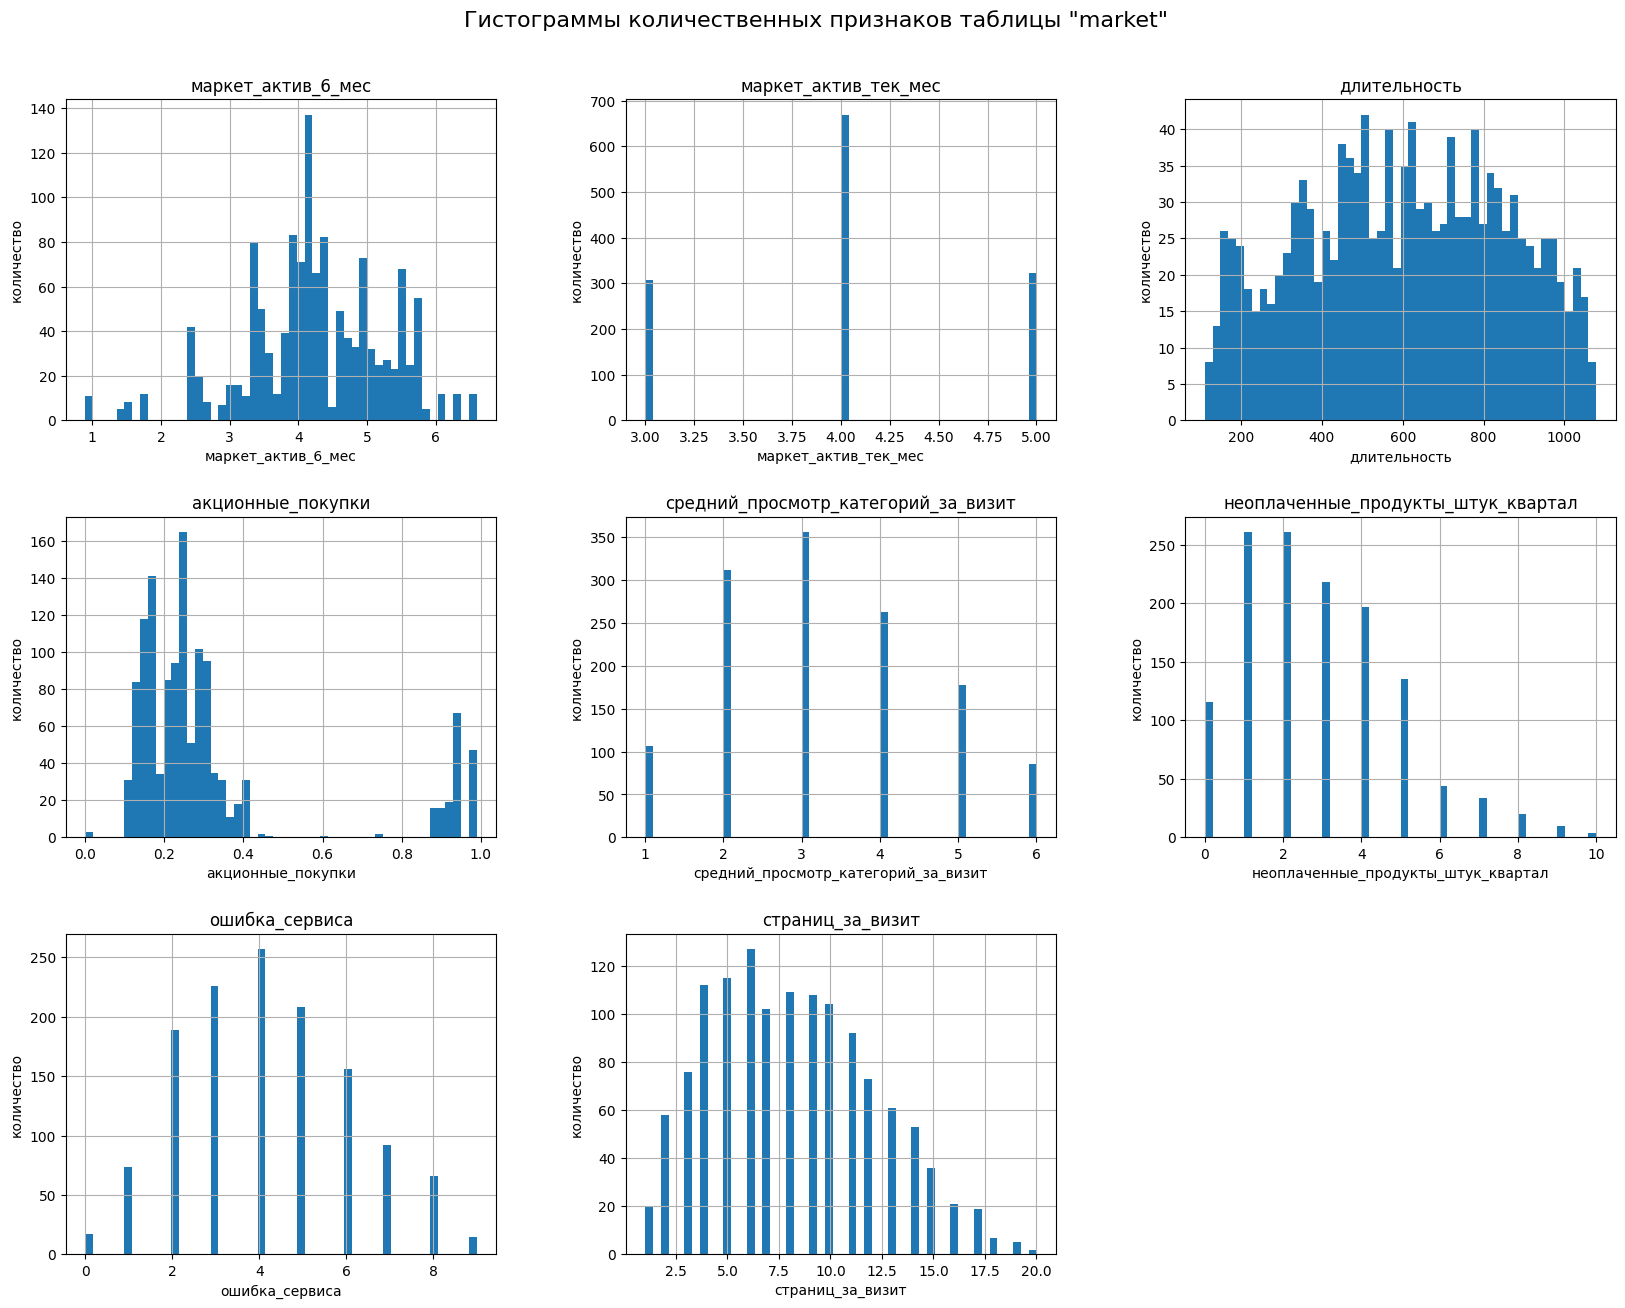

In [24]:
axes = market.iloc[:, 1:].hist(figsize=(20, 15), bins=50)

for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('количество')
    
plt.suptitle('Гистограммы количественных признаков таблицы "market"', fontsize=16, y=0.94)
plt.show()

В среднем за 6 месяцев компания делает по 4 рассылки для каждого пользователя. Есть сегмент клиентов, которые покупают товары по акции. Признак `акционные_покупки` можно преобразовать в бинарный категориальный.

In [25]:
print('покупательская активность снизилась:', (market.query('акционные_покупки > 0.8 and покупательская_активность == "Снизилась"'))['id'].count())
print('покупательская активность осталась прежней:', (market.query('акционные_покупки > 0.8 and покупательская_активность != "Снизилась"'))['id'].count())

покупательская активность снизилась: 132
покупательская активность осталась прежней: 33


Покупательская активность при аукционной покупке более 0.8 имеет снижение. Следовательно, существуют клиенты, которые любят покупать товары по скидкам. Стоит для данного контингента в рассылке упоминать про текущие скидки и акции. 

#### [Поиск выбросов количественных признаков таблицы 'market'](#task_3_plan_2) <a id='task_3_2'></a>

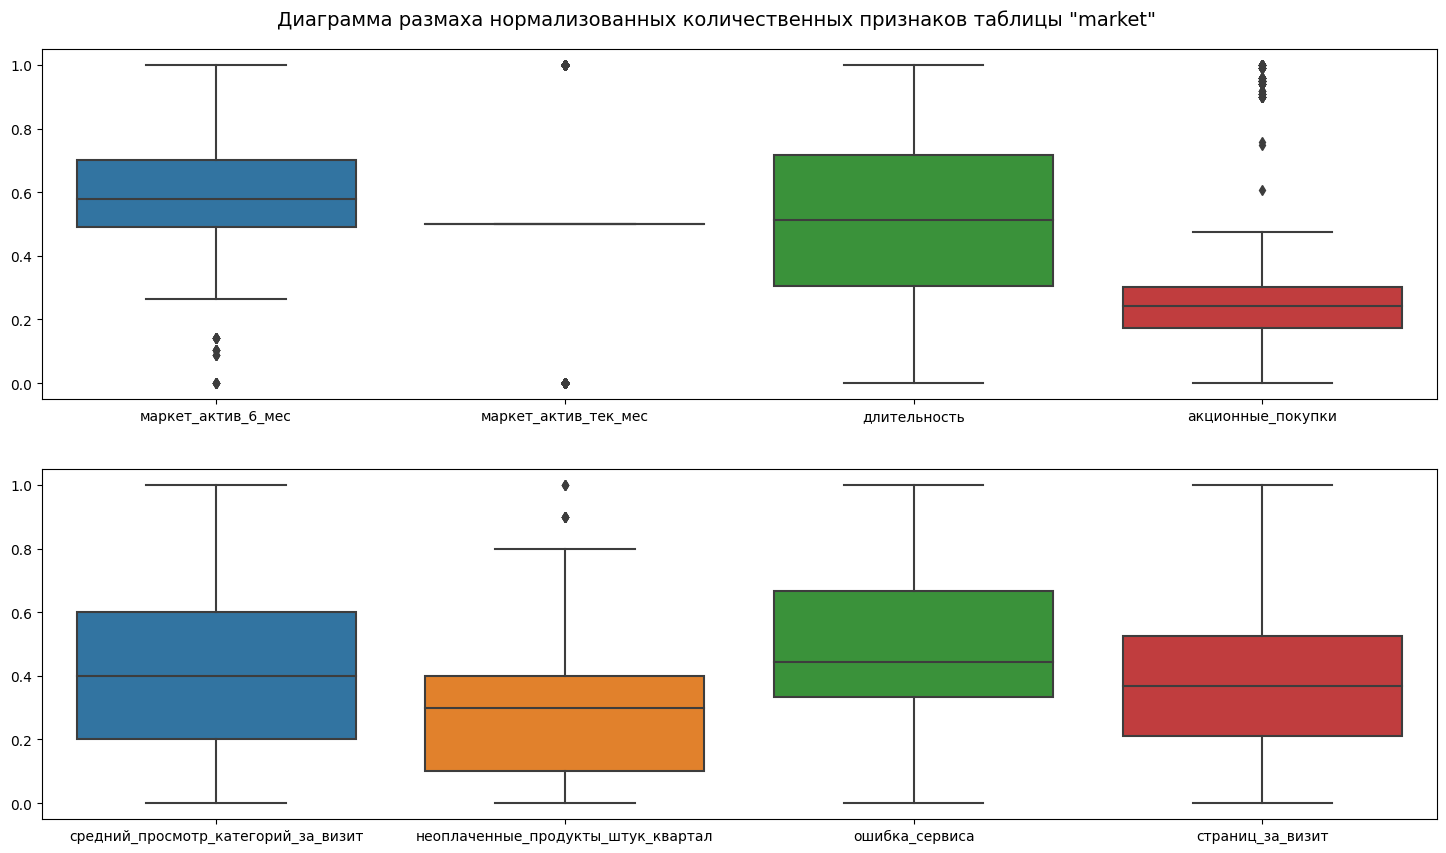

In [26]:
market_num_columns = market.select_dtypes(include='number').columns[1:]
market_num = market[market_num_columns].copy()

for clm in market_num.columns: # Нормализация
    market_num[clm] = (market_num[clm] - market_num[clm].min())/(market_num[clm].max() - market_num[clm].min())
    
plt.figure(figsize=(18, 10))
plt.suptitle('Диаграмма размаха нормализованных количественных признаков таблицы "market"', fontsize=14, y=0.92)

plt.subplot(2, 1, 1)
sns.boxplot(data=market_num.iloc[:, :4], orient='v')
plt.subplot(2, 1, 2)
sns.boxplot(data=market_num.iloc[:, 4:], orient='v')
plt.show()

Диаграмма размаха показала выбросы у `маркет_актив_6_мес`, `акционные_покупки`, `неоплаченные_продукты_штук_квартал`. 

1. `маркет_актив_6_мес` - наблюдаются выбросы в среднем за 6 месяцев до 2 рассылок. Нет необходимости в удалении таких значений. Возможно, клиент попал в базу не в первый месяц, в связи с этим такие низкие значения.
2. `акционные_покупки` - избавиться от 'выбросов' поможет преобразование в бинарный признак. `любитель_акций` с значением 1, где больше 0.8 и 0 - меньше порога.
3. `неоплаченные_продукты_штук_квартал` - ранговый признак, нет необходимости в удалении выбрасов.

In [27]:
market['любитель_акций'] = market['акционные_покупки'] >= 0.8

На основе столбца `акционные_покупки` был создан бинарный категориальный признак `любитель_акций` - клиенты, которые любят покупать товары по скидкам.

#### [Исследовательский анализ категориальных признаков таблицы 'market'](#task_3_plan_3) <a id='task_3_3'></a>

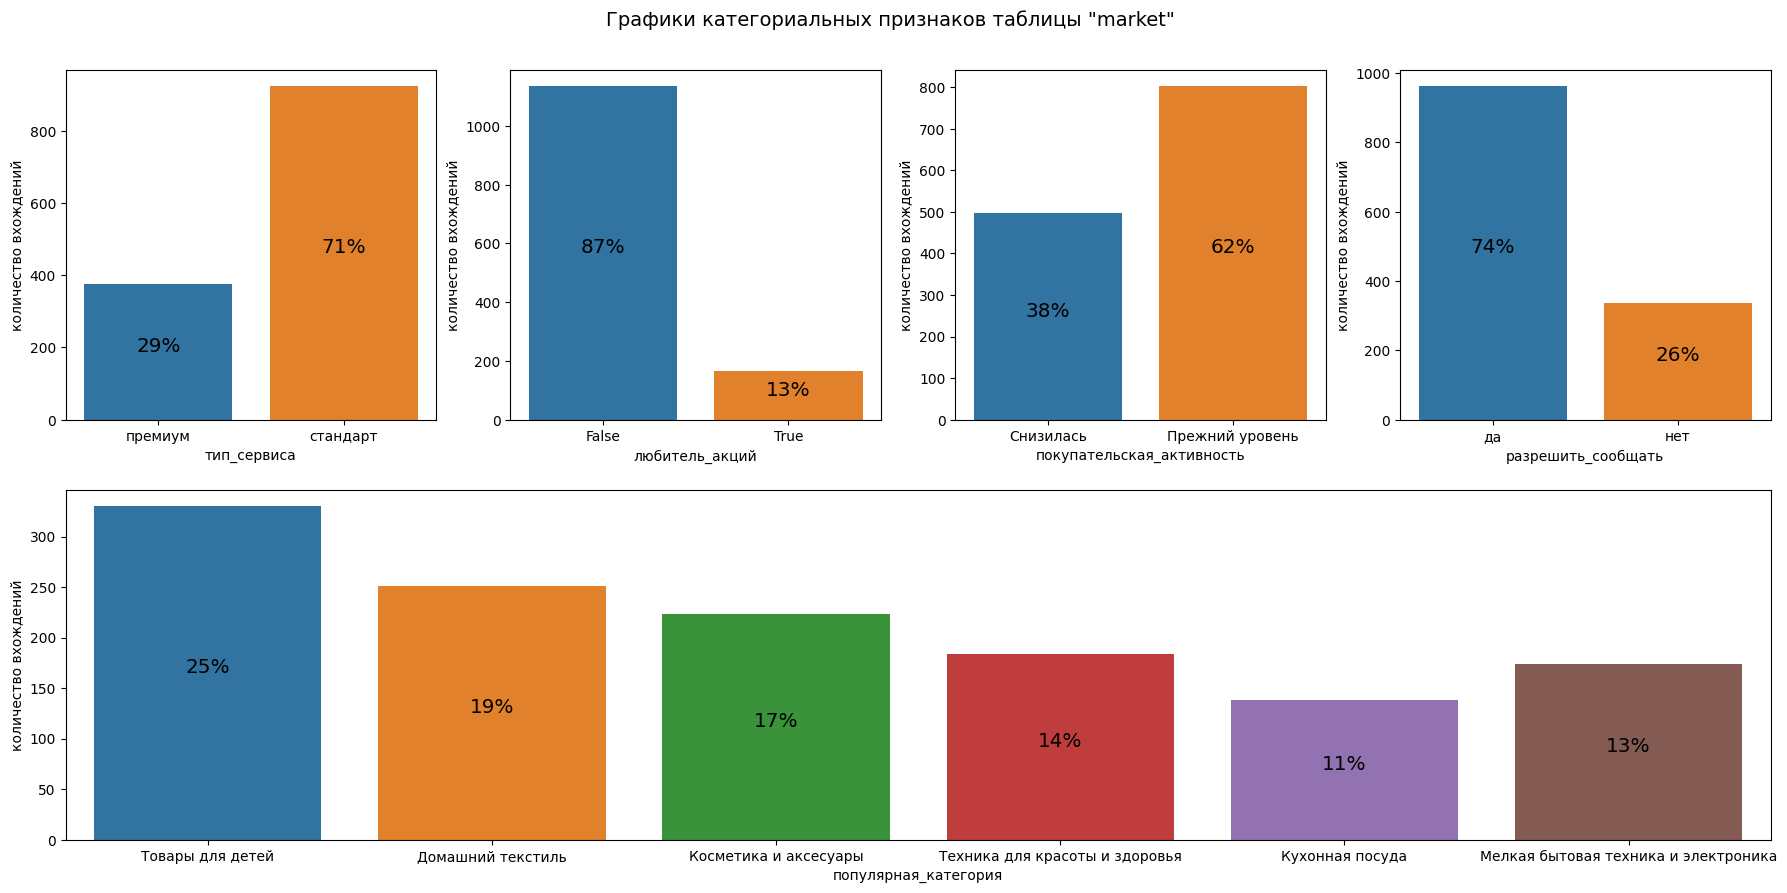

In [28]:
market_category_columns = sorted(market.select_dtypes(exclude='number').columns.tolist(), key=lambda x: x[-1])[:-1]
total = market[market_category_columns].shape[0]

fg = plt.figure(figsize=(22, 10))
gs = fg.add_gridspec(2, 4)

plt.suptitle('Графики категориальных признаков таблицы "market"', fontsize=14, y=0.94)

# Отображение графиков с процентами 
for i, n in enumerate(market_category_columns):
    fg.add_subplot(gs[0, i])
    ax = sns.countplot(x=market[market_category_columns].columns[i], data=market)
    # Текстовое поле
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x() + p.get_width() / 2,
                y=height/2,
                s=f'{height/total*100:.0f}%',
                ha="center",
                size='x-large')
    plt.ylabel('количество вхождений')


# популярная_категория в процентах
fg.add_subplot(gs[1, :])
ax = sns.countplot(x='популярная_категория', data=market)
plt.ylabel('количество вхождений')

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height/2,
            s=f'{height/total*100:.0f}%',
            ha="center",
            size='x-large')

Имеется дисбаланс классов целевого признака `покупательская_активность`. Значение 'Прежний_уровень' в 62% наблюдений, 'Снизилась' - в 38%. \
`тип_сервиса` в 29% - 'премиум'. 74% пользователей разрешают присылать дополнительные предложения о товаре. \
Наиболее `популярная_категория` за 6 месяцев - 'Товары для детей' (25%)

#### [Исследовательский анализ признаков таблицы 'market_money'](#task_3_plan_4) <a id='task_3_4'></a>

In [29]:
def get_hist_for_period(df, category):
    plt.figure(figsize=(16, 6))
    period_columns = df['период'].unique()
    for i, type_period in enumerate(period_columns):
        plt.subplot(1,len(period_columns),i+1)
        sns.histplot(df.query('период == @type_period')[category])
        plt.title(type_period)
        plt.ylabel('количество')

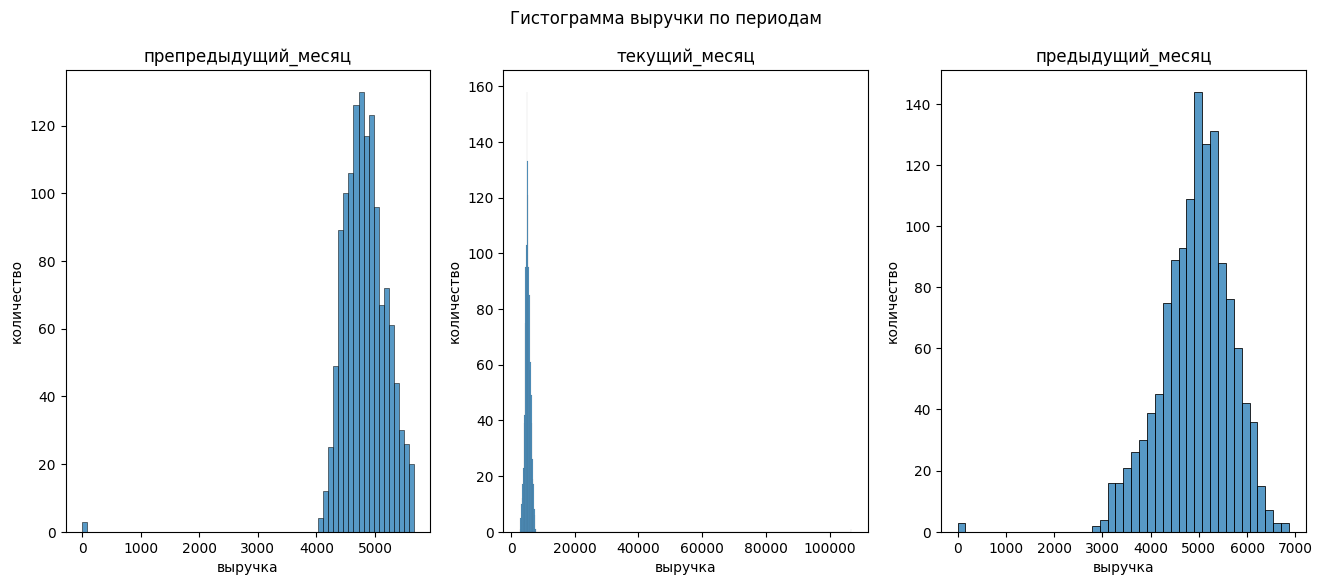

In [30]:
get_hist_for_period(market_money, 'выручка')
plt.suptitle('Гистограмма выручки по периодам');

Наблюдаются аномальные значения в трех категориях.

In [31]:
market_money.query('период == "препредыдущий_месяц" and выручка < 10')

id               период  выручка
0   215348  препредыдущий_месяц      0.0
28  215357  препредыдущий_месяц      0.0
35  215359  препредыдущий_месяц      0.0

С трех пользователей в препредыдущем месяце выручка равна нулю. Предполагаю, что данные пользователи либо не пользовались магазином в этом периоде, либо стали клиентами только в предыдущем/текущем месяце.

In [32]:
market_money.query('период == "предыдущий_месяц" and выручка < 10')

id            период  выручка
2   215348  предыдущий_месяц      0.0
29  215357  предыдущий_месяц      0.0
34  215359  предыдущий_месяц      0.0

In [33]:
id_to_del = market_money.query('период == "препредыдущий_месяц" and выручка < 10')['id'].to_list()

market_money = market_money[~(market_money['id'].isin(id_to_del))].reset_index(drop=True)
market = market[~(market['id'].isin(id_to_del))].reset_index(drop=True)
market_time = market_time[~(market_time['id'].isin(id_to_del))].reset_index(drop=True)
money = money[~(money['id'].isin(id_to_del))].reset_index(drop=True)

Данные пользователи присутствуют только в текущем месяце. Так как необходимо отобрать пользователей с покупательской активностью не менее трёх месяцев, они были удалены вовсе из всех таблиц.

In [34]:
display(market_money.query('период == "текущий_месяц" and выручка > 10000'))
print('\nКакую выручку приносил пользователь за 3 месяца:')
display(market_money.query('id == 215380'))

id         период   выручка
89  215380  текущий_месяц  106862.2


Какую выручку приносил пользователь за 3 месяца:


id               период   выручка
87  215380  препредыдущий_месяц    5051.0
88  215380     предыдущий_месяц    6077.0
89  215380        текущий_месяц  106862.2

In [35]:
market_money.loc[(market_money['id'] == 215380) & (market_money['период'] == "текущий_месяц"), 'выручка'] = \
    market_money.query('id == 215380 and период != "текущий_месяц"')['выручка'].mean()

Аномальное значение выручки в текущем месяце было заменено на среднее арифметическое по двум предыдущим.

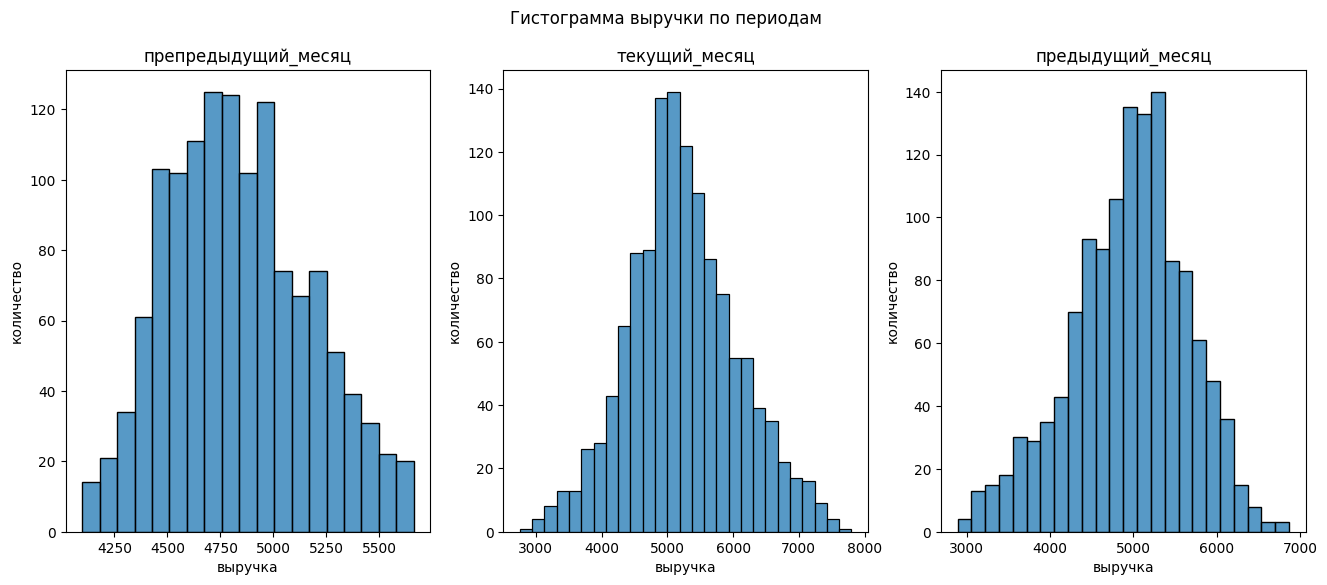

In [36]:
get_hist_for_period(market_money, 'выручка')
plt.suptitle('Гистограмма выручки по периодам');

#### [Исследовательский анализ признаков таблицы 'market_time'](#task_3_plan_5) <a id='task_3_5'></a>

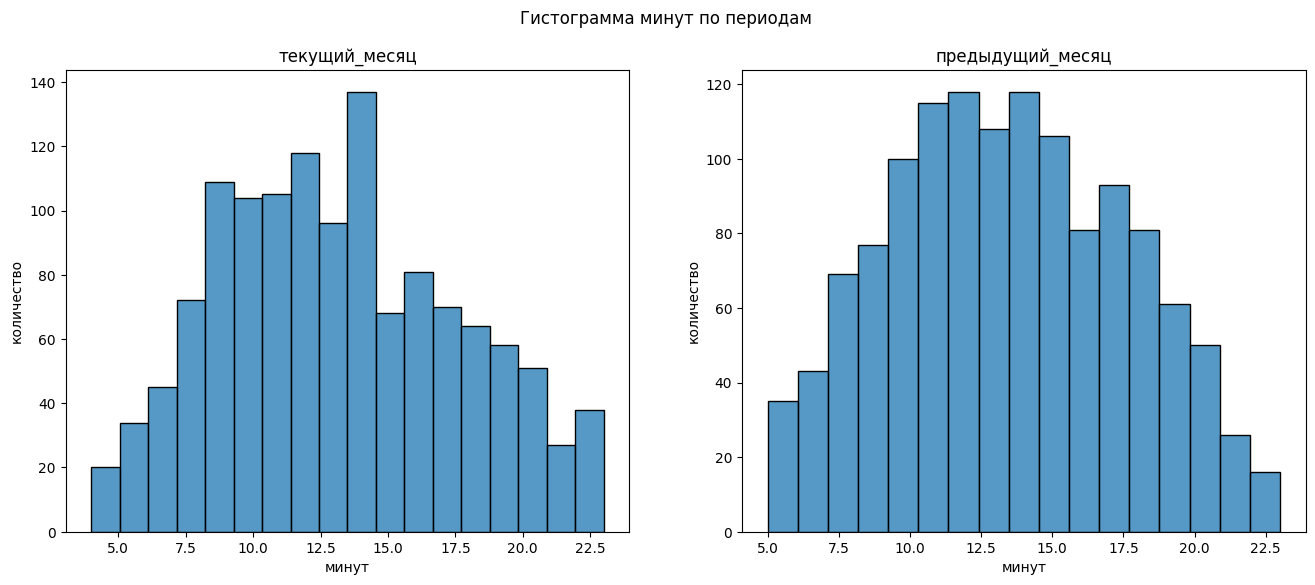

In [37]:
get_hist_for_period(market_time, category='минут')
plt.suptitle('Гистограмма минут по периодам');

Количественные признаки не имеют выбросов. В среднем пользователи проводят на сайте около 13 минут. Периоды не имеют дисбаланса.

#### [Исследовательский анализ признаков таблицы 'money'](#task_3_plan_6) <a id='task_3_6'></a>

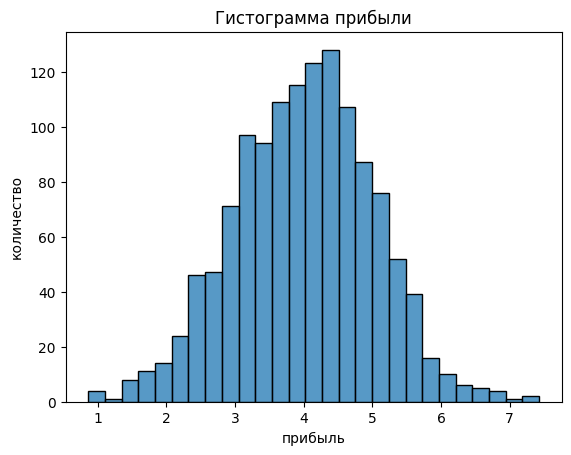

In [38]:
plt.title('Гистограмма прибыли')
sns.histplot(x='прибыль', data=money)
plt.ylabel('количество');

В таблице `money` отсутствуют выбросы.

#### Вывод исследовательского анализа

Существуют клиенты, которые любят покупать товары по акциям. Можно для данного контингента в рассылке упоминать про текущие скидки и акции. В среднем за 6 месяцев компания делает по 4 рассылки для каждого пользователя. \
Имеется дисбаланс классов целевого признака `покупательская_активность`, значение 'Прежний_уровень' в 62% наблюдений, 'Снизилась' - в 38%. \
Наиболее `популярная_категория` за 6 месяцев - 'Товары для детей' (25%). \
13% пользователей покупают исключительно акционные товары. \
Пользователи, имеющие активность только в текущем месяце были удалены из датасетов, отобраны клиенты с покупательской активностью не менее трёх месяцев.

Ранговые переменные: `период` из таблиц `market_money` и `market_time`. Все остальные категориальные признаки - номинальные.

<font size="2">[вернуться к плану выполнения](#plan_global)</font>

### [Объединение таблиц](#task_4_plan) <a id='task_4'></a>

In [39]:
market_money_time = pd.merge_asof(market_money, market_time, on='id', by='период', direction='nearest')
round((market_money_time.isna().mean()*100).sort_values(ascending=False), 2)

минут      33.33
id          0.00
период      0.00
выручка     0.00
dtype: float64

После объединения таблиц **`market_money`** и **`market_time`** появились пропуски в колонке `минут` при препредыдущем месяце.

In [40]:
market_money_time_agg = market_money_time.pivot(index='id', columns='период')
market_money_time_agg.columns = ["_".join(clm) for clm in market_money_time_agg.columns] # Избавление от мульти индекса

market_money_time_agg = (market_money_time_agg
                         .reset_index()
                         .drop('минут_препредыдущий_месяц', axis=1))

market_money_time_agg.head(10)

id  выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
0  215349                    5216.0                       4472.0   
1  215350                    5457.5                       4826.0   
2  215351                    6158.0                       4793.0   
3  215352                    5807.5                       4594.0   
4  215353                    4738.5                       5124.0   
5  215354                    5685.0                       4503.0   
6  215355                    3263.0                       4749.0   
7  215356                    4146.5                       4433.0   
8  215358                    3488.0                       4727.0   
9  215360                    5304.5                       5555.0   

   выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  
0                 4971.6                    12.0                 10.0  
1                 5058.4                     8.0                 13.0  
2                 6610.4                    11.0                 13.0  
3                 5872.5                     8.0                 11.0  
4                 5388.5                    10.0                 10.0  
5                 5869.6                    11.0                 12.0  
6                 3772.6                    12.0                 10.0  
7                 4566.4                     6.0                  7.0  
8                 4209.5                    14.0                 10.0  
9                 5834.9                     9.0                  6.0

Значения `период` объединенной таблицы были преобразованы в столбцы. Столбец `минут_препредыдущий_месяц` состоящий из пропусков был удален.

In [41]:

market_global = market.merge(market_money_time_agg, on='id')
market_global.head(10)


id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   
5  215354                 Снизилась    стандарт                 да   
6  215355                 Снизилась    стандарт                нет   
7  215356                 Снизилась    стандарт                 да   
8  215358                 Снизилась    стандарт                 да   
9  215360                 Снизилась     премиум                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   
5                 5.1                     3           431               0.23   
6                 4.7                     4           284               0.17   
7                 4.2                     4           192               0.14   
8                 4.7                     4           450               0.13   
9                 3.9                     3           623               0.35   

    популярная_категория  средний_просмотр_категорий_за_визит  \
0       Товары для детей                                    4   
1      Домашний текстиль                                    5   
2       Товары для детей                                    5   
3       Товары для детей                                    3   
4      Домашний текстиль                                    4   
5  Косметика и аксесуары                                    2   
6       Товары для детей                                    5   
7  Косметика и аксесуары                                    2   
8      Домашний текстиль                                    4   
9        Кухонная посуда                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   
5                                   3               7                 2   
6                                   1               6                 4   
7                                   2               1                 3   
8                                   2               6                 4   
9                                   1               4                 7   

   любитель_акций  выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
0           False                    5216.0                       4472.0   
1           False                    5457.5                       4826.0   
2            True                    6158.0                       4793.0   
3            True                    5807.5                       4594.0   
4           False                    4738.5                       5124.0   
5           False                    5685.0                       4503.0   
6           False                    3263.0                       4749.0   
7           False                    4146.5                       4433.0   
8           False                    3488.0                       4727.0   
9           False                    5304.5          

In [42]:
market_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

#### Вывод объединения таблиц

При слиянии **`market_money`** и **`market_time`** появился столбец `минут_препредыдущий_месяц`, состоящий из пропусков, который был удален. В итоговой объединенной таблице **`market_global`** отсутсвуют пропуски, все клиенты имеют покупательскую активность не менее 3 месяцев.

<font size="2">[вернуться к плану выполнения](#plan_global)</font>

### [Корреляционный анализ](#task_5_plan) <a id='task_5'></a>

#### [Корреляционный анализ категориальных признаков](#task_5_plan_1) <a id='task_5_1'></a>

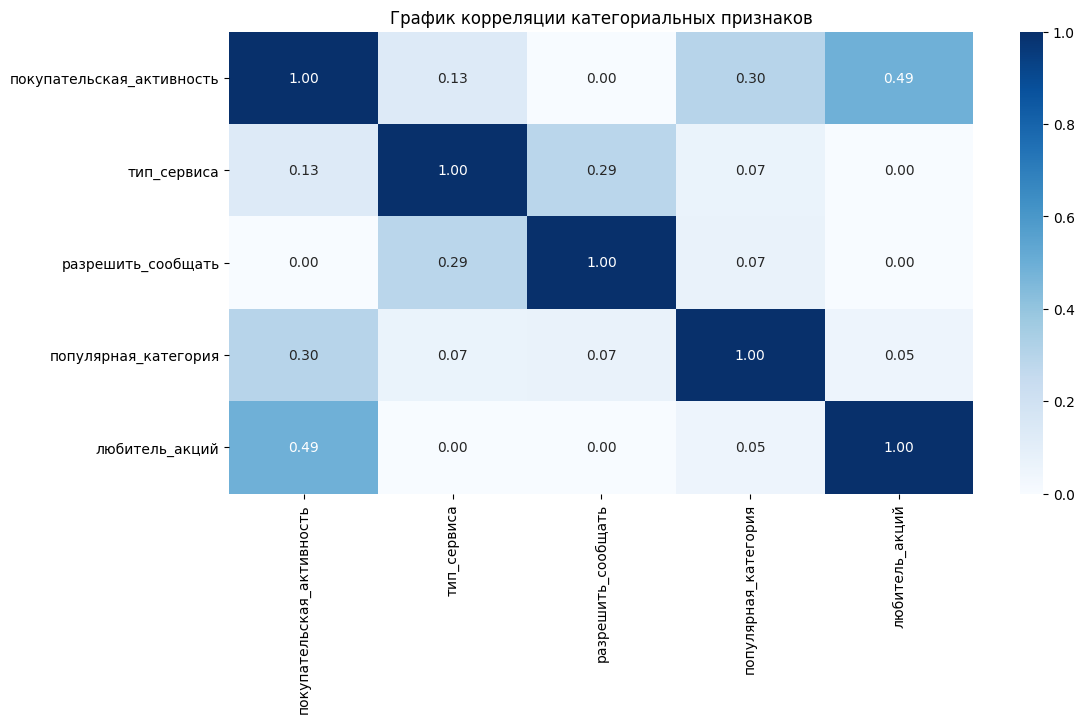

In [43]:
cat_col_mg = market_global.select_dtypes(exclude='number').columns

plt.figure(figsize=(12, 6))
plt.title('График корреляции категориальных признаков')
sns.heatmap(market_global[cat_col_mg].phik_matrix(), annot=True, fmt='.2f', cmap='Blues');

- Умеренную связь имеют:
    - `любицель_акций` и `покупательская_активность`
    - `популярная_категория` и `покупательская_активность`
    - `тип_сервиса` и `разрешить_сообщать`

#### [Корреляционный анализ количественных признаков](#task_5_plan_2) <a id='task_5_2'></a>

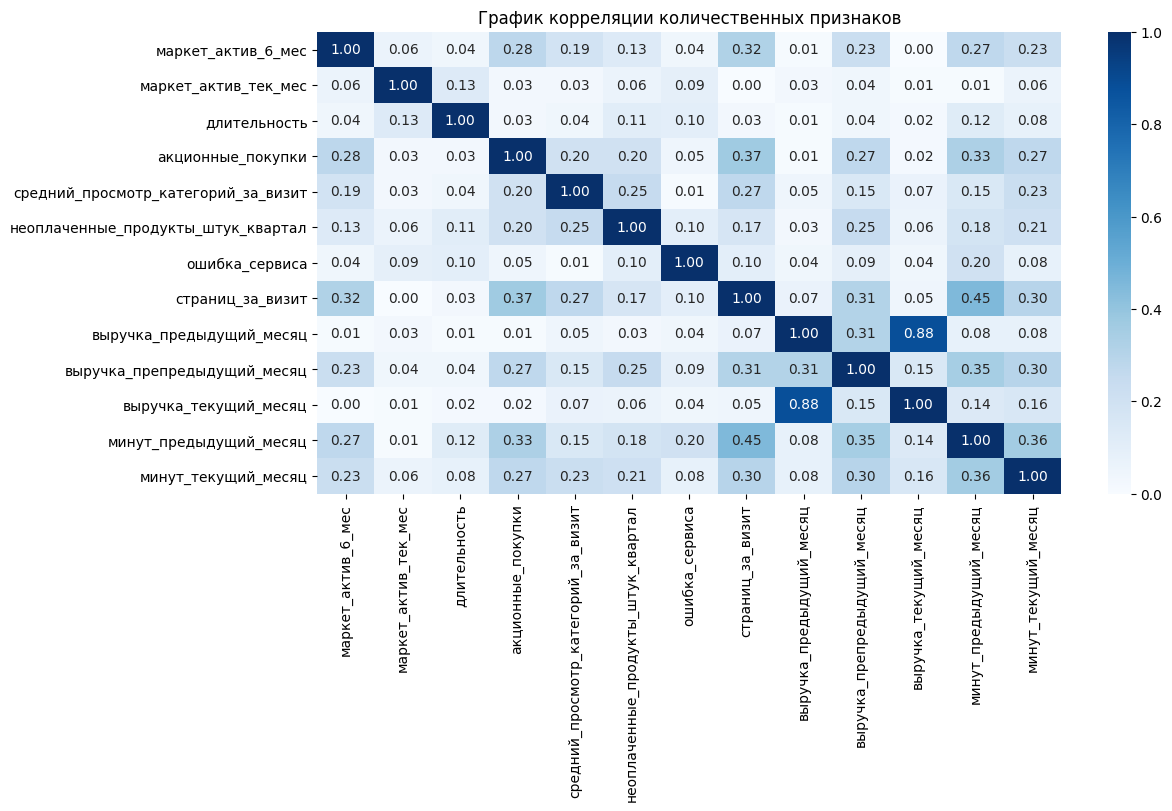

In [44]:
num_col_mg = market_global.select_dtypes(include='number').columns[1:]

plt.figure(figsize=(12, 6))
plt.title('График корреляции количественных признаков')
sns.heatmap(np.abs(round(market_global[num_col_mg].corr(method='spearman'),2)), annot=True, fmt='.2f', cmap='Blues');

Мультиколлинеарность: наблюдается высокая связь у признаков `выручка_предыдущий_месяц` и `выручка_текущий_месяц`, а `выручка_препредыдущий_месяц` имеет умеренную связь с этими признаками.

#### [Диаграммы рассеяния между всеми количественными признаками с влиянием целевого](#task_5_plan_3) <a id='task_5_3'></a>

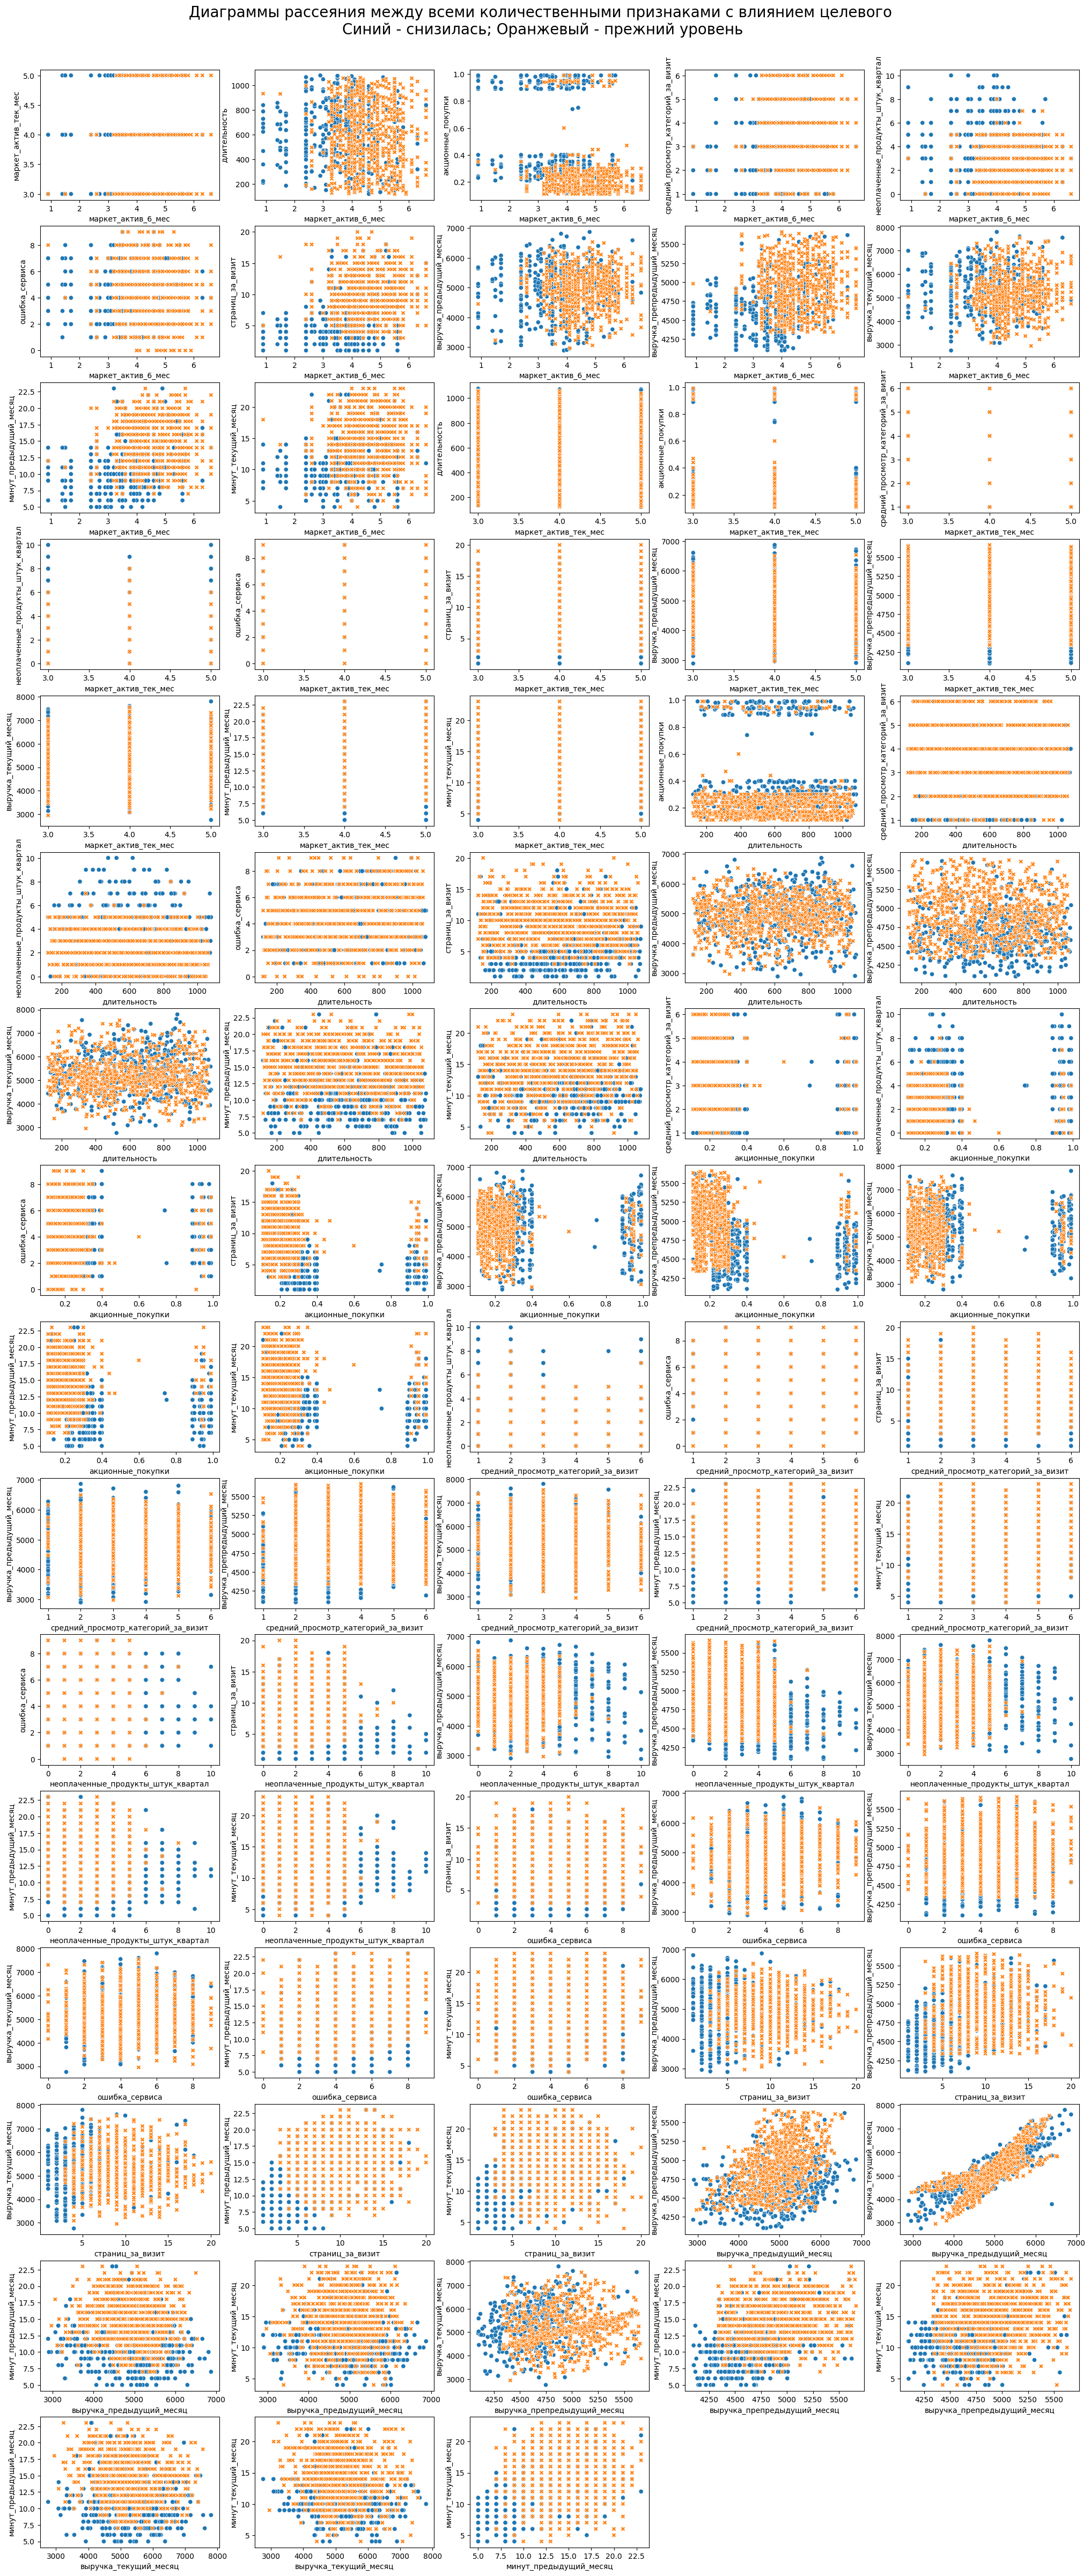

In [45]:
plt.figure(figsize=(25, 60))
plt.suptitle('Диаграммы рассеяния между всеми количественными признаками с влиянием целевого \nСиний - снизилась; Оранжевый - прежний уровень',
              y=0.9,
              fontsize=20)

k = 0
for i, col_1 in enumerate(num_col_mg):
    for col_2 in num_col_mg[i+1:]:
        k += 1
        plt.subplot(16, 5, k)
        sns.scatterplot(data=market_global, x=col_1, y=col_2, hue='покупательская_активность', style="покупательская_активность", legend=False)

Заметно снижение покупательской активности при малом значении признаков: `старниц_за_визит`, `минут_предыдущий_месяц`, `выручка_предыдущий_месяц`, и при большом `неоплаченные_продукты_штук_квартал`.

#### Вывод корреляционного анализа

1. Категориальные признаки:
    - Умеренная связь:
        - `любицель_акций` и `покупательская_активность`
        - `популярная_категория` и `покупательская_активность`
        - `тип_сервиса` и `разрешить_сообщать`


2. Количественные признаки:
    - Мультиколлинеарность: 
        - наблюдается высокая связь у признаков `выручка_предыдущий_месяц` и `выручка_текущий_месяц`, а `выручка_препредыдущий_месяц` имеет умеренную связь с этими признаками.

3. Заметно снижение покупательской активности при малом значении признаков: `старниц_за_визит`, `минут_предыдущий_месяц`, `выручка_предыдущий_месяц`, и при большом `неоплаченные_продукты_штук_квартал`.

<font size="2">[вернуться к плану выполнения](#plan_global)</font>

### [Использование пайплайнов](#task_6_plan) <a id='task_6'></a>

#### [Подготовка данных](#task_6_plan_1) <a id='task_6_1'></a>

In [46]:
ohe_col = ['тип_сервиса', 'любитель_акций']
ord_col = ['популярная_категория']
num_col = ['маркет_актив_6_мес', 'длительность', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', \
           'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', \
            'минут_предыдущий_месяц', 'минут_текущий_месяц']



X_train, X_test, y_train, y_test = train_test_split(market_global[ohe_col + ord_col + num_col],
                                                    market_global['покупательская_активность'],
                                                    random_state=RANDOM_STATE,
                                                    stratify=market_global['покупательская_активность'])

# Кодирование целевого признака
le = LabelEncoder()
y_train = pd.Series(le.fit_transform(y_train))
y_test = pd.Series(le.transform(y_test))
le.classes_

array(['Прежний уровень', 'Снизилась'], dtype=object)

Были отобраны входные признаки, не имеющие мультиколлинеарности. 

Бинарные признаки будут закодированы с помощью OneHotEncoder. Категориальный признак `популярная_категория`, состоящий из 6 категорий, будет закодирован OrdinalEncoder, чтобы не множить признаки. Количественные признаки находятся в таблице 'num_col_mg'. \
Датасет был разделен на тренировочные и тестовые данные. Целевой признак был закодирован с помощью LabelEncoder: 'Прежний уровень' - 0, 'Снизилась' - 1.

In [47]:
ohe_pipe = Pipeline(
    [
        ('simple_imputer_ohe',
        SimpleImputer(missing_values=np.nan, strategy='most_frequent')),

        ('ohe',
        OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
    ]
)

Пайплайн для кодирования OHE с предобработкой пропусков самым встречаемым значением.

In [48]:
ord_pipe = Pipeline(
    [
        ('simple_imputer_before_ord',
         SimpleImputer(missing_values=np.nan, strategy='most_frequent')),

        ('ord',
        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),

        ('simple_imputer_after_ord',
        SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

Пайплайн с заполнением пропусков до и после кодирования OrdinalEncoder.

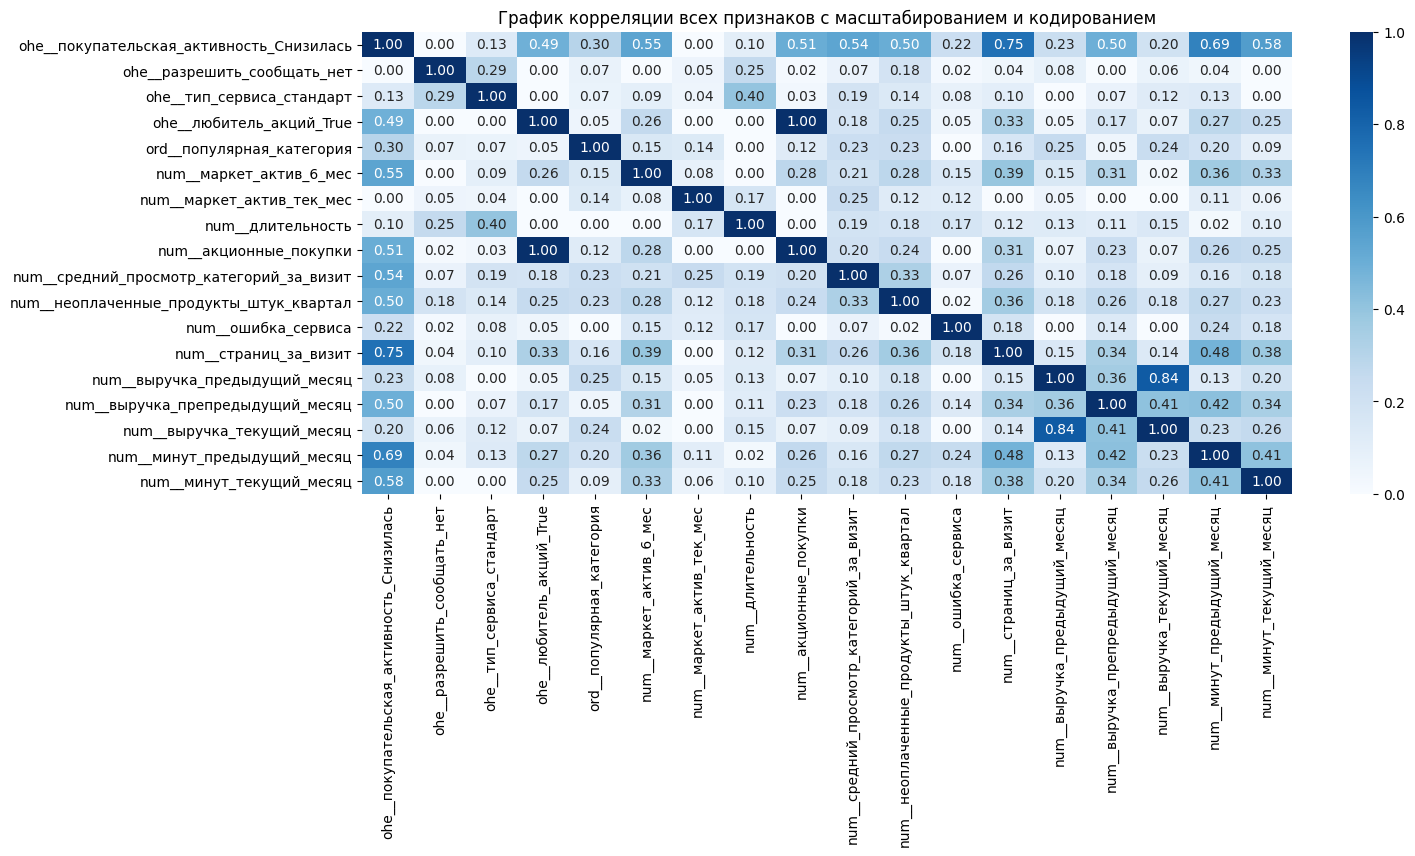

In [49]:
data_preprocessor_corr = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ['покупательская_активность', 'разрешить_сообщать'] + ohe_col),
        ('ord', ord_pipe, ord_col),
        ('num', StandardScaler(), num_col_mg)
    ], 
    remainder='passthrough'
)


train_p =  data_preprocessor_corr.fit_transform(market_global.drop(['id'], axis=1))
clmn = data_preprocessor_corr.get_feature_names_out()

plt.figure(figsize=(15, 6))
plt.title('График корреляции всех признаков с масштабированием и кодированием')
sns.heatmap(pd.DataFrame(data=train_p, columns=clmn).phik_matrix(interval_cols=clmn),
            annot=True, fmt='.2f',
            cmap='Blues')

plt.show() 

Целевой признак имеет с многими входными корреляцию. Исскуственный признак `любитель_акций` имеет мультиколлинеарность с `акционные_покупки`.

In [50]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col),
        ('ord', ord_pipe, ord_col),
        ('num', StandardScaler(), num_col)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsClassifier(n_neighbors=25))
])

Итоговый пайплайн для подготовки данных и обученя модели.

#### [Обучение модели. Подбор гиперпараметров](#task_6_plan_2) <a id='task_6_2'></a>

In [51]:
param_grid= [
    {'models':[DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'models__max_depth': range(3, 15),
     'models__max_features': range(2, 5),
     'models__min_samples_split': range(2,7),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
    
    {'models': [KNeighborsClassifier()],
     'models__n_neighbors': range(10, 100, 5),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},

    {'models': [LogisticRegression(random_state=RANDOM_STATE)],
     'models__penalty': ['l1', 'l2', 'elasticnet', None],
     'models__C': range(1, 10),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},

    {'models': [SVC(random_state=RANDOM_STATE, probability=True)],
     'models__C': range(1, 10),
     'models__kernel': ['poly', 'rbf', 'sigmoid'],
     'models__degree': range(2, 8)}
]


grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=3,
    scoring={'roc_auc_score':'roc_auc',
             'f1_score': 'f1'},
    refit='f1_score',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

/home/serguntsov/miniconda3/envs/practicum/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/serguntsov/miniconda3/envs/practicum/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simple_imputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['тип_сервиса',
                                                                          'любитель_акций']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('simple_...
                          'models__C': range(1, 10),
                          'models__penalty': ['l1', 'l2', 'elasticnet', None],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [SVC(probability=True, random_state=42)],
                          'models__C': range(1, 10),
                          'models__degree': range(2, 8),
                          'models__kernel': ['poly', 'rbf', 'sigmoid']}],
             refit='f1_score',
             scoring={'f1_score': 'f1', 'roc_auc_score': 'roc_auc'})

При поиске гиперпараметров оценивалось две метрики: ROC-AUC и F1. \
Так как precision и recall в данной задачи равнозначны, то была выбрана метрика F1. \
Метрика ROC-AUC была выбрана в связи с дисбалансом целевого класса, accuracy может быть не точным.

In [52]:
res_pipe = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_f1_score', ascending=False).drop('params', axis=1)
res_pipe[~res_pipe.duplicated(subset=['param_models'])]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
733       0.140009      0.027722         0.086154        0.019043   
598       0.046168      0.006079         0.043489        0.001957   
549       0.040298      0.010594         0.093295        0.007167   
133       0.035241      0.006141         0.045902        0.008874   

                                param_models  param_models__max_depth  \
733   SVC(probability=True, random_state=42)                      NaN   
598      LogisticRegression(random_state=42)                      NaN   
549                   KNeighborsClassifier()                      NaN   
133  DecisionTreeClassifier(random_state=42)                      5.0   

     param_models__max_features  param_models__min_samples_split  \
733                         NaN                              NaN   
598                         NaN                              NaN   
549                         NaN                              NaN   
133                         4.0                              6.0   

    param_preprocessor__num  param_models__n_neighbors  param_models__C  \
733                     NaN                        NaN              2.0   
598          MinMaxScaler()                        NaN              1.0   
549        StandardScaler()                       25.0              NaN   
133          MinMaxScaler()                        NaN              NaN   

    param_models__penalty  param_models__degree param_models__kernel  \
733                   NaN                   6.0                  rbf   
598                    l2                   NaN                  NaN   
549                   NaN                   NaN                  NaN   
133                   NaN                   NaN                  NaN   

     split0_test_roc_auc_score  split1_test_roc_auc_score  \
733                   0.905594                   0.920202   
598                   0.889698                   0.920726   
549                   0.898091                   0.921976   
133                   0.848825                   0.861613   

     split2_test_roc_auc_score  mean_test_roc_auc_score  \
733                   0.893347                 0.906381   
598                   0.880806                 0.897077   
549                   0.879194                 0.899753   
133                   0.836552                 0.848997   

     std_test_roc_auc_score  rank_test_roc_auc_score  split0_test_f1_score  \
733                0.010978                       13              0.830189   
598                0.017112                       57              0.807175   
549                0.017505                       55              0.805687   
133                0.010232                      215              0.775330   

     split1_test_f1_score  split2_test_f1_score  mean_test_f1_score  \
733              0.835556              0.825688            0.830477   
598              0.817391              0.807175            0.810580   
549              0.823529              0.786730            0.805315   
133              0.791304              0.779221            0.781952   

     std_test_f1_score  rank_test_f1_score  
733           0.004034                   1  
598           0.004816                  55  
549           0.015026                  65  
133           0.006801                 119

Лучшая модель: **SVC** с гиперпараметрами C=2, kernel='rbf' и предобработкой количественных признаков с помощью StandardScaler.

Модели и их метрики на кросс-валидации:
1. **SVC**
    - roc-auc: 0.906
    - f1: 0.83
2. **LogisticRegression**:
    - roc-auc: 0.897
    - f1: 0.81
3. **KNeighborsClassifier**
    - roc-auc: 0.899
    - f1: 0.80
4. **DecisionTreeClassifier**
    - roc-auc: 0.848
    - f1: 0.78

In [53]:
print('f1:', round(f1_score(y_test, grid_search.predict(X_test)), 2))
print('roc-auc:', round(roc_auc_score(y_test, grid_search.predict_proba(X_test)[:,1]), 3))

f1: 0.88
roc-auc: 0.914


Метрики модели оказались лучше на тестовой, чем при кросс-валидации. Следовательно, переобучение удалось обойти стороной.

#### Вывод обучения модели

- Были отобраны входные признаки, не имеющие мультиколлинеарности. Целевой признак был закодирован с помощью LabelEncoder: 'Прежний уровень' - 0, 'Снизилась' - 1. При поиске гиперпараметров оценивалось две метрики: ROC-AUC и F1, метрики на тестовых данных не подвели.


- Модели и их метрики на кросс-валидации:
    1. **SVC**
        - roc-auc: 0.906
        - f1: 0.83
    2. **LogisticRegression**:
        - roc-auc: 0.897
        - f1: 0.81
    3. **KNeighborsClassifier**
        - roc-auc: 0.899
        - f1: 0.80
    4. **DecisionTreeClassifier**
        - roc-auc: 0.848
        - f1: 0.78

- Лучшая модель: **SVC** с гиперпараметрами C=2, kernel='rbf' и предобработкой количественных признаков с помощью StandardScaler.

<font size="2">[вернуться к плану выполнения](#plan_global)</font>

### [Анализ важности признаков](#task_7_plan) <a id='task_7'></a>

#### [Визуализации вклада признаков в каждое предсказание модели](#task_7_plan_1) <a id='task_7_1'></a>

PermutationExplainer explainer: 973it [12:07,  1.32it/s]                         


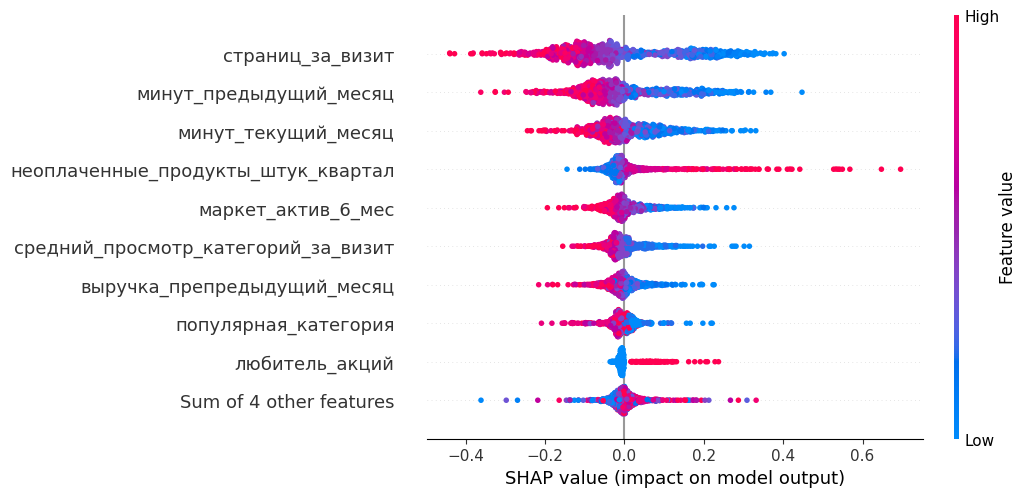

In [ ]:
preprocessor = grid_search.best_estimator_.named_steps['preprocessor']
model = grid_search.best_estimator_.named_steps['models']

X_train_scaled = pd.DataFrame(data=preprocessor.transform(X_train), columns=X_train.columns)

explainer = shap.Explainer(model.predict, X_train_scaled)
shap_values = explainer(X_train_scaled)

shap.plots.beeswarm(shap_values) 

Чем больше у наблюдения значение признака `неоплаченные_продукты_штук_квартал`, тем выше вероятность отнесения к классу **'Снизилась'**. \
Остальные признаки с большими значениями повышают вероятность отнесения к классу **"Прежний уровень'**

#### [Индивидуальные SHAP-значения выборочного наблюдения](#task_7_plan_2) <a id='task_7_2'></a>

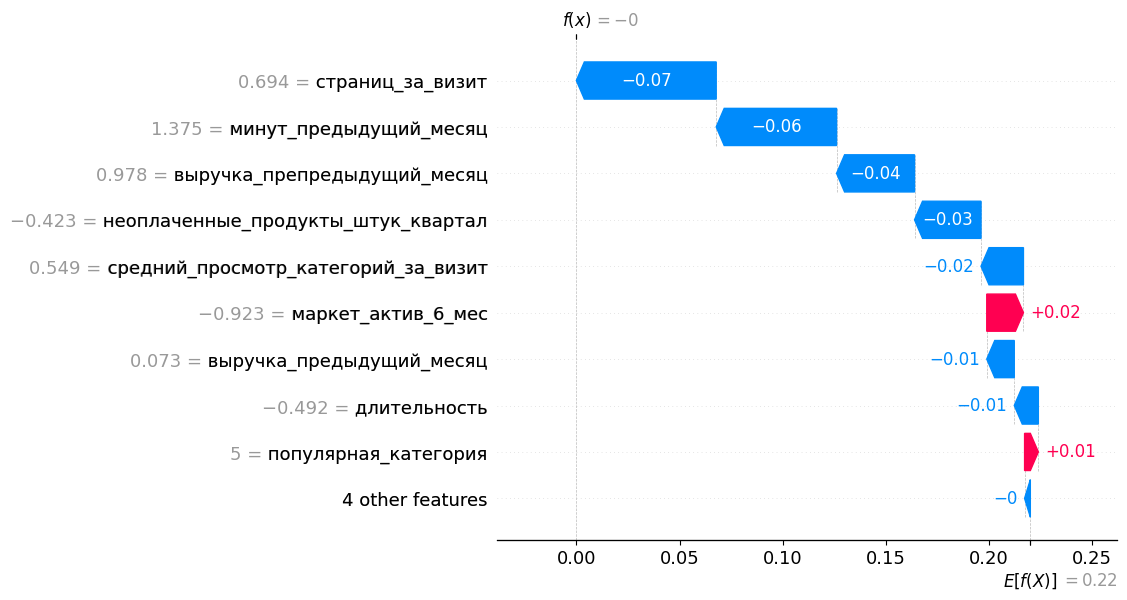

In [ ]:
shap.plots.waterfall(shap_values[42]) 

In [ ]:
display(X_train_scaled.iloc[42, :])
print('Значение целевого класса:', y_train[42])

тип_сервиса                            1.000000
любитель_акций                         0.000000
популярная_категория                   5.000000
маркет_актив_6_мес                    -0.922580
длительность                          -0.492107
средний_просмотр_категорий_за_визит    0.548512
неоплаченные_продукты_штук_квартал    -0.422969
ошибка_сервиса                         0.398628
страниц_за_визит                       0.694326
выручка_предыдущий_месяц               0.072783
выручка_препредыдущий_месяц            0.978107
минут_предыдущий_месяц                 1.374837
минут_текущий_месяц                   -0.526204
Name: 42, dtype: float64

Значение целевого класса: 0


Высокие значения признаков `страниц_за_визит`, `минут_предыдущий_месяц`, `выручка_препредыдущий_месяц` и малое значение признака `неоплаченные_продукты_штук_квартал` склоняют к классу 0, к чему и относится выбранное наблюдение.

#### [Общий вклад признаков в прогнозы модели](#task_7_plan_3) <a id='task_7_3'></a>

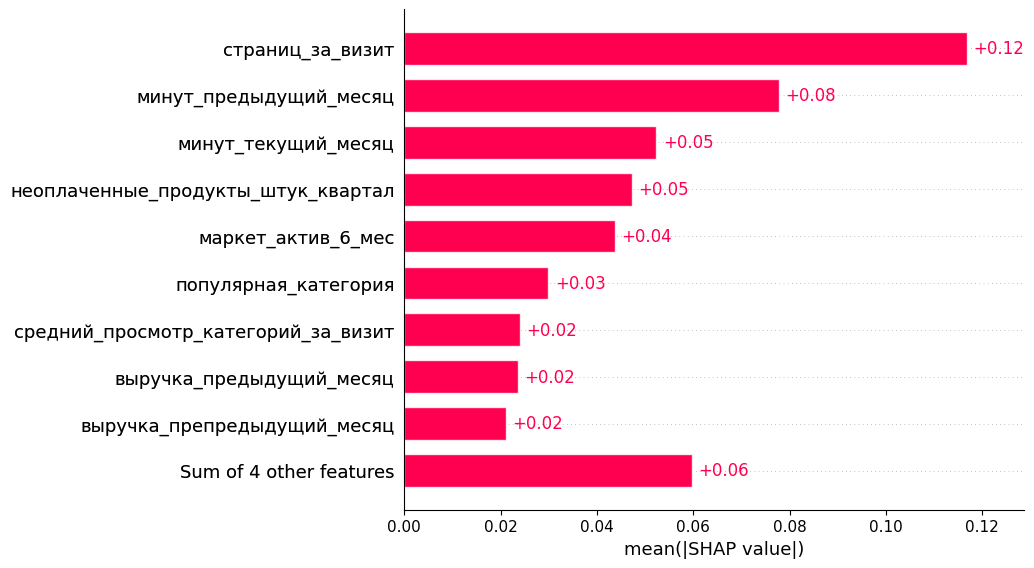

In [86]:
shap.plots.bar(shap_values) 

#### Вывод анализа важности признаков


- Признаки, имеющие наибольшее влияние:
    1. `страниц_за_визит`
    2. `минут_предыдущий_месяц`
    3. `выручка_препредыдущий_месяц`
    4. `неоплаченные_продукты_штук_квартал`


- Малозначимые признаки:
    1. `выручка_препредыдущий_мексяц`
    2. `выручка_предыдущий_мексяц`
    3. `средний_просмотр_категорий_за_визит`


Если у пользователя в корзине много неоплаченных продуктов, то есть высокая вероятность снижения покупательской активности. Можно напоминать таким пользователям о продуктах в корзине и появившихся на них акций, либо предлагать им индивидуальные скидки, промокоды для привлечения к покупке.

<font size="2">[вернуться к плану выполнения](#plan_global)</font>

### Сегментация покупателей

In [134]:
X_test_scaled = pd.DataFrame(data=preprocessor.transform(X_test), columns=X_test.columns)
y_preds = round(pd.DataFrame(data=model.predict_proba(X_test_scaled)[:, 1], columns=['вероятность_снижения']), 2)

# Выделение сегмента
test_segment = pd.concat([X_test.reset_index(drop=True), y_preds], axis=1)
test_segment.query('любитель_акций and вероятность_снижения >= 0.8', inplace=True)
test_segment

тип_сервиса  любитель_акций            популярная_категория  \
21     стандарт            True                 Кухонная посуда   
22     стандарт            True                 Кухонная посуда   
34     стандарт            True                 Кухонная посуда   
51      премиум            True  Техника для красоты и здоровья   
66     стандарт            True               Домашний текстиль   
80     стандарт            True  Техника для красоты и здоровья   
84     стандарт            True               Домашний текстиль   
97     стандарт            True               Домашний текстиль   
100    стандарт            True                Товары для детей   
135     премиум            True               Домашний текстиль   
146    стандарт            True                Товары для детей   
158     премиум            True                Товары для детей   
180    стандарт            True                Товары для детей   
182    стандарт            True               Домашний текстиль   
185     премиум            True                 Кухонная посуда   
196     премиум            True  Техника для красоты и здоровья   
198    стандарт            True           Косметика и аксесуары   
206    стандарт            True               Домашний текстиль   
224     премиум            True               Домашний текстиль   
235     премиум            True           Косметика и аксесуары   
237    стандарт            True               Домашний текстиль   
247    стандарт            True  Техника для красоты и здоровья   
273    стандарт            True           Косметика и аксесуары   
276     премиум            True           Косметика и аксесуары   
284     премиум            True                 Кухонная посуда   
297     премиум            True           Косметика и аксесуары   
298    стандарт            True  Техника для красоты и здоровья   
303    стандарт            True               Домашний текстиль   
304     премиум            True                Товары для детей   
318    стандарт            True                Товары для детей   
322    стандарт            True                Товары для детей   

     маркет_актив_6_мес  длительность  средний_просмотр_категорий_за_визит  \
21                  3.9           855                                    2   
22                  4.1           490                                    3   
34                  5.6           342                                    2   
51                  4.1           557                                    1   
66                  2.4           534                                    4   
80                  0.9           788                                    3   
84                  4.0           336                                    2   
97                  2.4           298                                    6   
100                 4.0           753                                    2   
135                 4.3           708                                    3   
146                 3.4           519                                    2   
158                 4.1          1047                                    5   
180                 4.6           844                                    3   
182                 4.0           451                                    2   
185                 4.1           768                                    2   
196                 3.5           929                                    3   
198                 2.4           186                                    3   
206                 1.7           472                                    2   
224                 0.9           657                                    2   
235                 3.0           862                                    1   
237                 3.1           810                                    4   
247                 3.9           564                                    3   
273                 0.9           624                            

Отобрана группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.

In [135]:
test_segment.describe()

маркет_актив_6_мес  длительность  средний_просмотр_категорий_за_визит  \
count           31.000000     31.000000                            31.000000   
mean             3.325806    585.677419                             2.645161   
std              1.106938    216.690315                             1.279281   
min              0.900000    167.000000                             1.000000   
25%              3.000000    462.500000                             2.000000   
50%              3.500000    557.000000                             2.000000   
75%              4.050000    760.500000                             3.000000   
max              5.600000   1047.000000                             6.000000   

       неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
count                           31.000000       31.000000         31.000000   
mean                             5.096774        3.806452          3.967742   
std                              2.196282        1.681653          1.797848   
min                              1.000000        2.000000          1.000000   
25%                              3.000000        3.000000          3.000000   
50%                              4.000000        3.000000          3.000000   
75%                              7.000000        4.500000          5.000000   
max                              9.000000        7.000000          8.000000   

       выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
count                 31.000000                    31.000000   
mean                5041.354839                  4625.193548   
std                  766.714464                   258.836553   
min                 3432.000000                  4098.000000   
25%                 4563.500000                  4505.500000   
50%                 5055.500000                  4611.000000   
75%                 5703.500000                  4773.000000   
max                 6349.000000                  5269.000000   

       минут_предыдущий_месяц  минут_текущий_месяц  вероятность_снижения  
count                31.00000            31.000000             31.000000  
mean                  9.83871             9.870968              0.975161  
std                   2.46437             2.692483              0.037936  
min                   6.00000             5.000000              0.840000  
25%                   8.00000             8.000000              0.980000  
50%                   9.00000            10.000000              0.990000  
75%                  11.00000            11.000000              1.000000  
max                  16.00000            19.000000              1.000000

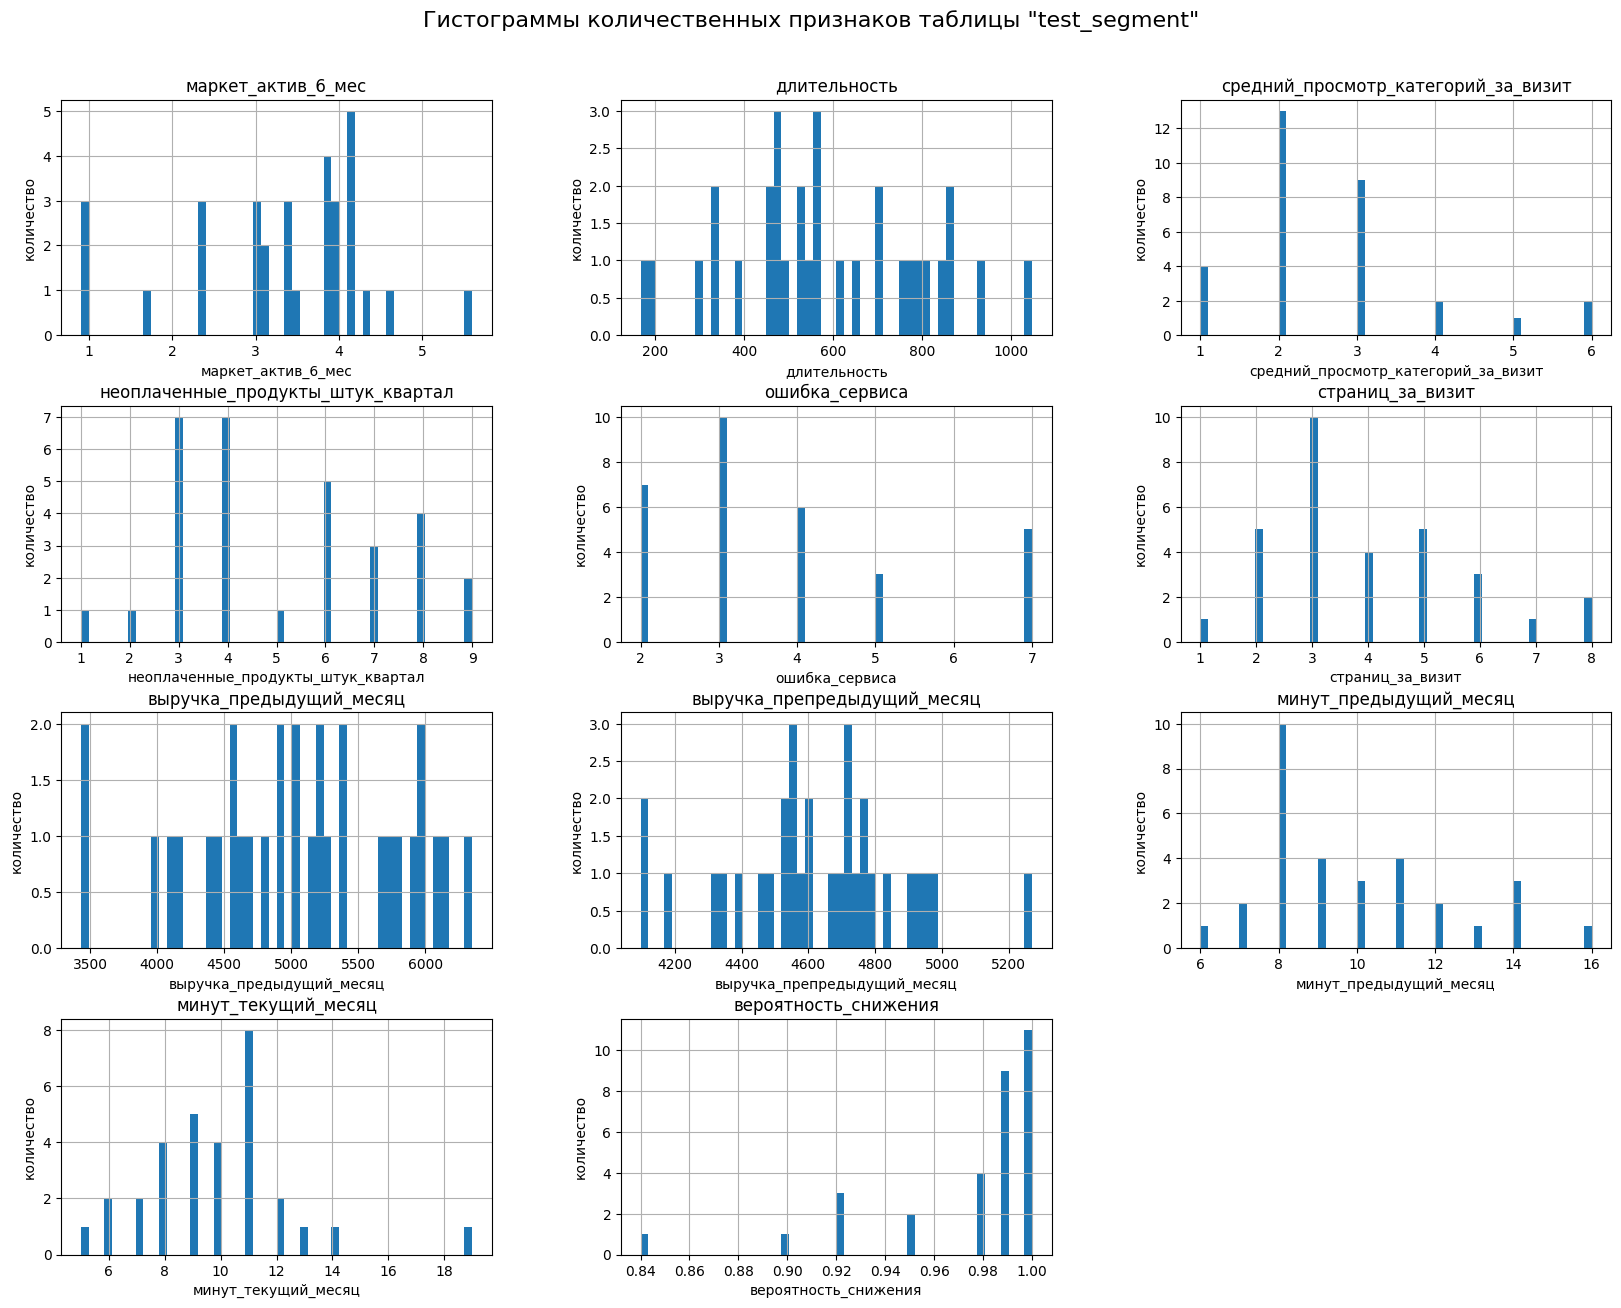

In [136]:
axes = test_segment.hist(figsize=(20, 15), bins=50)

for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('количество')
    
plt.suptitle('Гистограммы количественных признаков таблицы "test_segment"', fontsize=16, y=0.94)
plt.show()

#### Вывод сегментации покупателей

Отобранный сегмент имеет малые (до медианные) значения признака `страниц_за_визит`, в среднем незначительную выручку за `препредыдущий месяц` и выше среднего `неоплаченные_продукты_штук_квартал`. 

Вероятнее всего, снижение покупательской активности критически не связано с данными признаками. Возможно, в магазине пропали акции на любимые категории покупателей, либо они не значительные. \
Можно для данного контингента в рассылке упоминать про текущие скидки и акции на товары, находящиеся в корзине, либо по их любимой категории. \
Также, можно добавить на сайт подборку сниженных цен на любимые категории. Так клиент дольше будет находиться на сайте, что может повысить его покупательскую активность.

<font size="2">[вернуться к плану выполнения](#plan_global)</font>

### Общий вывод

1. ETL (предобработка данных)
    - Названия столбцов были приведены к нижнему змеиному регистру, согласно стандартам оформления
    - Опечатки в датасетах `market`, `market_time` были исправлены
    - Дубликаты в таблицах отсутствуют


2. EDA (исследовательский и корреляционный анализ данных)
    - В среднем за 6 месяцев компания делает по 4 рассылки для каждого пользователя
    - Наиболее `популярная_категория` за 6 месяцев - 'Товары для детей'
    - 13% пользователей покупают исключительно акционные товары
    - Заметно снижение покупательской активности при малом значении признаков: 
        - `старниц_за_визит`
        - `минут_предыдущий_месяц`
        - `выручка_предыдущий_месяц`
        - и при большом `неоплаченные_продукты_штук_квартал`.
    - Высокая корреляция с целевым признаком:
        - `страниц_за_визит` - 0.75
        - `минут_предыдущий_месяц` - 0.69
        - `минут_текущий_месяй` - 0.58
        - `маркет_актив_6_мес` - 0.55
        - `средний_просмотр_категорий_за_визит` - 0.54
        - `неоплаченные_продукты_штук_квартал` - 0.5
        - `выручка_препредыдущий_месяц` - 0.5
        - `любитель_акций` - 0.49
        

3. Лучшая модель
    - **SVC** с гиперпараметрами C=2, kernel='rbf' и предобработкой количественных признаков с помощью StandardScaler.
    - Метрики при кросс-валидации:
        - roc-auc: 0.906
        - f1: 0.83
    - Метрики на тестовой выборке:
        - roc-auc: 0.914
        - f1: 0.88


4. Важность признаков
    - Признаки, имеющие наибольшее влияние:
        1. `страниц_за_визит`
        2. `минут_предыдущий_месяц`
        3. `выручка_препредыдущий_месяц`
        4. `неоплаченные_продукты_штук_квартал`
    - Малозначимые признаки:
        1. `выручка_препредыдущий_мексяц`
        2. `выручка_предыдущий_мексяц`
        3. `средний_просмотр_категорий_за_визит`

5. Предложения для повышения покупательской активности
    - Если у пользователя в корзине много неоплаченных продуктов, то есть высокая вероятность снижения покупательской активности. Можно напоминать таким пользователям о продуктах в корзине и появившихся на них акций
    - Для пользователей, любящих покупать по сниженным ценам, в рассылке упоминать про текущие скидки на товары, находящиеся в корзине, либо по их любимой категории.
    - Предлагать пользователям индивидуальные скидки, промокоды для привлечения к покупке.
    - Добавить на сайт подборку сниженных цен на любимые категории. Так клиент дольше будет находиться на сайте, что может повысить его покупательскую активность.
